# Overfitting and Underfitting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Bias and variance

<b>Bias</b> = ระยะห่างจากเป้าหมาย<br />
<b>Variance</b> = กระกระจายตัวของข้อมูล

<img src="../images/bias_variance.png" width="400" /><br />

## Overfitting and underfitting

<b>Overfitting</b> = model fit high-variance data<br />
<b>Underfitting</b> = ข้อมูลอยู่ไกลจาก predicted value (high bias)

<img src="../images/over_under_fitting.png" width="700" /><br />

## Learning curves

Learning curve เป็นกราฟระหว่าง score กับ training set size ถูกสร้างขึ้นเพื่อตรวจสอบว่า model หนึ่ง overfit/underfit หรือไม่ หรือมี training data เพียงพอหรือไม่

Score สูง ไม่จำเป็นต้องดีกว่า ขึ้นกับ metric ที่ใช้ ในที่นี้ เราจะให้ score คือ precision ดังนั้น score สูง แสดงว่าดี (error ต่ำ)

<img src="../images/learning_curve.png" width="700" /><br />

เมื่อ training data size มากขึ้น training score ควรจะลดลง validation score ควรจะเพิ่มขึ้น และทั้งสองควร converge (ถ้าไม่ converge แสดงว่า training data ไม่มากพอ)

<img src="../images/learning_curve_2.png" width="450" /><br />


In [2]:
# Thanks Cedric John for data
# The data are already cleaned, have no duplicated/missing values
# and have been normalised (except for our target (porosity)).
# Import data
data = pd.read_csv('../data/core_data.csv')
data

,Depth CSF-A (m),NGR total counts (cps),Reflectance L*,Reflectance a*,Reflectance b*,Porosity (vol%)
0,0.000000,0.251540,0.364557,0.225914,0.470866,57.000000
1,0.000000,0.217357,0.496203,0.358804,0.341732,79.900000
2,0.000057,0.249050,0.426582,0.415282,0.407874,64.100000
3,0.000062,0.266326,0.469620,0.465116,0.444094,54.900000
4,0.000062,0.254531,0.417722,0.528239,0.516535,73.600000
...,...,...,...,...,...,...
5028,0.997032,0.090944,0.334177,0.318937,0.308661,11.900000
5029,0.998196,0.092910,0.772152,0.252492,0.366929,11.800000
5030,0.998389,0.079482,0.379747,0.275748,0.354331,11.433333
5031,0.998555,0.117835,0.440506,0.239203,0.360630,19.200000


In [3]:
# Data pre-processing

# Separate features (X) and target (y)
X, y = data.drop(columns="Porosity (vol%)"), data["Porosity (vol%)"]
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
# Train-val split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8, random_state=42)

In [4]:
# Define a function for plotting learning curves
def plot_learning_curve(model, X_train, X_val, y_train, y_val):
    train_RMSEs, val_RMSEs, num_training_samples = [], [], []
    # Loop to increase every 10 training samples
    for i in range(1, int(np.floor(len(X_train)/10))):
        # Prepare training samples
        X_10i = X_train[:i*10]
        y_10i = y_train[:i*10]
        num_training_samples.append(i*10)
        # Predict on training samples and validation set by a KNN regressor
        lr = model.fit(X_10i, y_10i)
        y_train_pred = lr.predict(X_10i)
        y_val_pred = lr.predict(X_val)
        # Store training and validation RMSEs
        train_RMSEs.append(np.sqrt(mean_squared_error(y_10i, y_train_pred)))
        val_RMSEs.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(num_training_samples, train_RMSEs, label="Training RMSE")
    ax.plot(num_training_samples, val_RMSEs, label="Validation RMSE")
    ax.set(xlabel="The number of training samples", ylabel="RMSE", title=f"The learning curve of {model}")
    ax.legend();

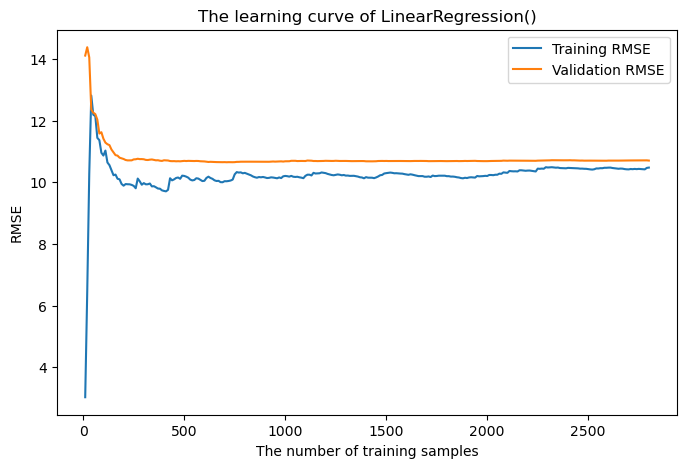

In [5]:
# Plot learning curve of a default linear regressor
plot_learning_curve(LinearRegression(), X_train, X_val, y_train, y_val)

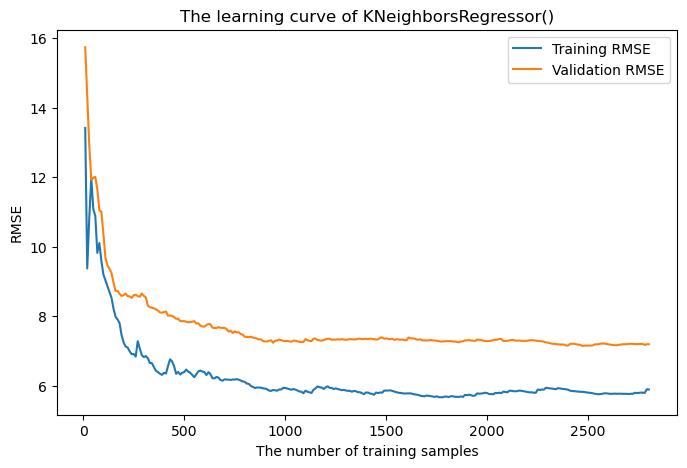

In [6]:
# Plot learning curve of a default KNN regressor 
# The number of neighbors (n_neighbors) is 5 by default
plot_learning_curve(KNeighborsRegressor(), X_train, X_val, y_train, y_val)

## Bias-variance tradeoff

เมื่อนำ trained model ไปใช้กับ (unseen) test set จะมี error เกิดขึ้น โดยที่

$$\text{Total error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible error}$$

<img src="../images/total_error.png" width="500" /><br />

model ที่ดีที่สุดควรจะมี total error ต่ำสุด (อยู่ที่ elbow ใน <b>elbow curve</b>)

<img src="../images/bias_variance_trade_off.png" width="600" /><br />


The best K is 10


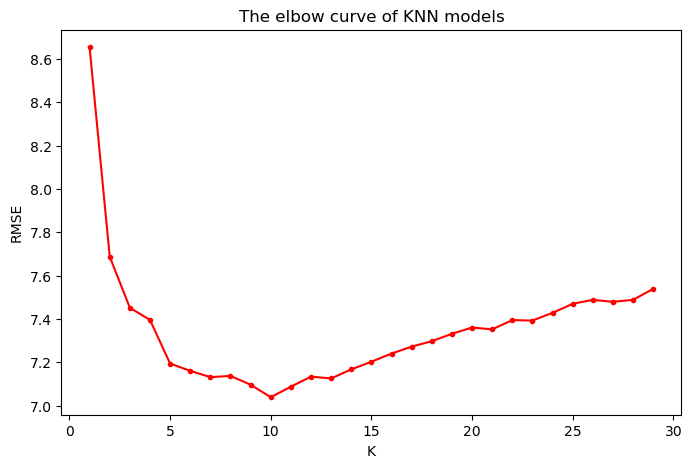

In [7]:
# Plot elbow curve of a KNN regressor to find the optimum number of neighbours (K)
val_RMSEs = []
for k in range(1, 30):
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_RMSEs.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(list(range(1, 30)), val_RMSEs, '.-', c='r')
ax.set(xlabel='K', ylabel="RMSE", title=f"The elbow curve of KNN models")
print("The best K is", val_RMSEs.index(min(val_RMSEs))+1)